In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import os

In [ ]:
os.getcwd()

'/content'

In [2]:
os.chdir("/content/drive/MyDrive")

Load data into the pickle file

In [ ]:
try:

    import tensorflow as tf
    import cv2
    import os
    import pickle
    import numpy as np
    print("Library Loaded Successfully ..........")
except:
    print("Library not Found ! ")


class MasterImage(object):

    def __init__(self,PATH='', IMAGE_SIZE = 50):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def Process_Image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path,cv2.IMREAD_GRAYSCALE)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)

            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 1)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.Process_Image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('X_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('Y_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('X_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('Y_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from PIckle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data





Library Loaded Successfully ..........


In [ ]:
if __name__ == "__main__":
    path = '/content/drive/MyDrive/DR'
    a = MasterImage(PATH=path,
                    IMAGE_SIZE=224)

    X_Data,Y_Data = a.load_dataset()
    print(X_Data.shape)

Could not Found Pickle File 
Loading File and Dataset  ..........
Found Categories  ['DR3', 'DR2', 'DR4', 'DR1', 'DR0'] 



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Pickled Image Successfully 
(413, 224, 224, 1)


In [ ]:
if __name__ == "__main__":
    path = '/content/drive/MyDrive/DR_test'
    a = MasterImage(PATH=path,
                    IMAGE_SIZE=224)

    X_Data,Y_Data = a.load_dataset()
    print(X_Data.shape)

Could not Found Pickle File 
Loading File and Dataset  ..........
Found Categories  ['DR0', 'DR1', 'DR2', 'DR3', 'DR4'] 

Pickled Image Successfully 
(103, 224, 224, 1)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


load all the data files as pickle file

In [3]:
import pickle
# loading training dataset
X_Temp = open('X_Data','rb')
X_Data = pickle.load(X_Temp)

Y_Temp = open('Y_Data','rb')
Y_Data = pickle.load(Y_Temp)

In [4]:
# Split the data into train and test 
from sklearn.model_selection import train_test_split

random_state = 40
X_train, X_test, y_train, y_test = train_test_split(
    X_Data, Y_Data, test_size=0.2, random_state=random_state)

In [5]:
print(X_train.shape)

(330, 224, 224, 1)


In [11]:
from scipy.ndimage.interpolation import rotate
import cv2
import numpy as np
import random

def flip_v(image):
  flipped_h = np.flipud(image)
  return flipped_v

def flip_h(image):
  flipped_h = np.fliplr(image)
  return flipped_h

def random_rotation(image):
  random_angle = random.randint(-25,25)
  rotated_image = rotate(image,random_angle)
  return rotated_image 

# Creating Augmented Dataset
X_train_augmented = [image for image in X_train]
y_train_augmented = [image for image in y_train]

for image,label in zip(X_train,y_train):
  X_train_augmented.append(flip_h(image))
  y_train_augmented.append(label)
for image,label in zip(X_train,y_train):
  X_train_augmented.append(flip_h(image))
  y_train_augmented.append(label)
"""for image,label in zip(X_train,y_train):
  X_train_augmented.append(random_rotation(image))
  y_train_augmented.append(label)"""


'for image,label in zip(X_train,y_train):\n  X_train_augmented.append(random_rotation(image))\n  y_train_augmented.append(label)'

In [22]:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [8]:
X_train_augmented.shape

(990, 224, 224, 1)

In [28]:
X_Validate =[]
X_Validate.append(X_Data[0])
X_Validate.append(X_Data[50])
X_Validate.append(X_Data[111])
X_Validate.append(X_Data[200])
X_Validate.append(X_train_augmented[380])
X_Validate.append(X_train_augmented[522])
X_Validate.append(X_train_augmented[850])
X_Validate.append(X_train_augmented[144])
X_Validate.append(X_test[30])
X_Validate.append(X_test[54])



In [29]:
X_Validate = np.array(X_Validate)
X_Validate.shape

(10, 224, 224, 1)

In [32]:
Y_Validate = np.array(Y_Validate)
Y_Validate.shape
Y_Validate

array([0, 0, 1, 1, 1, 4, 1, 2, 2, 0])

In [31]:
Y_Validate =[]
Y_Validate.append(Y_Data[0])
Y_Validate.append(Y_Data[50])
Y_Validate.append(Y_Data[111])
Y_Validate.append(Y_Data[200])
Y_Validate.append(y_train_augmented[380])
Y_Validate.append(y_train_augmented[522])
Y_Validate.append(y_train_augmented[850])
Y_Validate.append(y_train_augmented[144])
Y_Validate.append(y_test[30])
Y_Validate.append(y_test[54])

Augment All the images using the Training images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rotation_range =50,
    horizontal_flip = True,
    vertical_flip = True,
    rescale =1./255,
    shear_range =0.5,
    zoom_range =(0.2,0.6)
)


In [ ]:
train_gen.fit(X_train)



In [20]:
from tensorflow.keras.applications import EfficientNetB0

EFNB0 = EfficientNetB0(weights='train_2.h5',include_top=False,input_shape=(224,224,1))


In [ ]:
print(EFNB0)

In [ ]:
import os
os.getcwd()

'/content/drive/My Drive'

In [ ]:
EFNB0.save_weights('train_2.h5')

In [ ]:
EFNB0.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
_____________________________________________________________________________________

In [ ]:
for layer in EFNB0.layers:
  layer.trainable = False

In [ ]:
EFNB0.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
_____________________________________________________________________________________

In [23]:
feature_extractor = EFNB0.predict(X_train_augmented)
features = feature_extractor.reshape(feature_extractor.shape[0],-1)
X_for_training = features

In [ ]:
print(feature_extractor)

[[[[-6.08306507e-08  3.19098064e-08  9.02035246e-09 ... -3.76068847e-08
     2.44394744e-08 -1.87832239e-08]
   [-5.25865680e-08  1.95144398e-08  7.68342989e-09 ... -2.73588281e-08
     1.96775964e-08 -8.29283309e-09]
   [-1.97005470e-08  4.49767086e-08  4.26161222e-08 ... -1.74699011e-08
     2.67983573e-08 -1.74267427e-08]
   ...
   [ 5.02622868e-08  3.84797332e-08  5.06614271e-08 ... -3.03165582e-09
     1.47205483e-08 -1.12451914e-08]
   [ 7.08518613e-08  3.11111030e-08  3.49254492e-08 ... -1.17187771e-08
     5.23824806e-09 -2.21559606e-08]
   [ 3.70895563e-08  3.04620578e-08  3.29242980e-08 ... -1.00790176e-08
     1.62917928e-08 -1.40361145e-08]]

  [[-5.34342774e-08  6.02804340e-09  1.44406469e-08 ... -3.80263465e-08
     5.00099056e-08 -2.43129819e-08]
   [-2.85193700e-08 -6.15547613e-09  4.69271910e-09 ... -8.18656645e-08
     4.79588707e-08  2.66769664e-08]
   [ 4.45053283e-09  2.44963747e-08  1.53708886e-08 ... -7.01302270e-08
     5.79081565e-08  2.95482323e-08]
   ...
   

In [35]:
import xgboost as XGB
model = XGB.XGBClassifier(learning_rate=0.001,n_estimators=25)
#model.fit(X_for_training,y_train_augmented)

In [40]:
feature_extractor = EFNB0.predict(X_Validate)
features = feature_extractor.reshape(feature_extractor.shape[0],-1)
Y_validate_predict =model.predict(features)
print(Y_validate_predict)
from sklearn import metrics
print('Accuracy =',metrics.accuracy_score(Y_validate_predict,Y_Validate))
print(Y_Validate)

[1 0 4 0 4 4 2 2 2 1]
Accuracy = 0.4
[0 0 1 1 1 4 1 2 2 0]


In [ ]:
y_ = model.predict(X_for_training)

In [ ]:
from sklearn import metrics
print ('Accuracy =',metrics.accuracy_score(y_train_augmented,y_))

Accuracy = 0.907070707070707


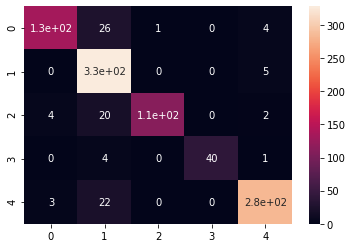

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm =confusion_matrix(y_train_augmented,y_)
sns.heatmap(cm,annot = True)

In [ ]:
from sklearn.metrics import classification_report
Target_labels =['DR0','DR1','DR2','DR3','DR4']
print(classification_report(y_train_augmented,y_,target_names = Target_labels))

              precision    recall  f1-score   support

         DR0       0.95      0.81      0.88       165
         DR1       0.82      0.98      0.89       333
         DR2       0.99      0.81      0.89       138
         DR3       1.00      0.89      0.94        45
         DR4       0.96      0.92      0.94       309

    accuracy                           0.91       990
   macro avg       0.94      0.88      0.91       990
weighted avg       0.92      0.91      0.91       990



In [ ]:
X_test_feature = EFNB0.predict(X_test)
X_test_features =X_test_feature.reshape(X_test_feature.shape[0],-1)

In [ ]:
Prediction = model.predict(X_test_features)

In [ ]:
print(Prediction)

In [ ]:
from sklearn import metrics
print ('Accuracy =',metrics.accuracy_score(y_test,Prediction))

Accuracy = 0.39759036144578314


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm =confusion_matrix(y_test,Prediction)
sns.heatmap(cm,annot = True)

In [ ]:
from sklearn.metrics import classification_report
Target_labels =['DR0','DR1','DR2','DR3','DR4']
print(classification_report(y_test,Prediction,target_names = Target_labels))

In [33]:
from sklearn import metrics
def get_score(model, X_train, X_test, y_train, y_test):
  #training
  feature_extractor = EFNB0.predict(X_train)
  features = feature_extractor.reshape(feature_extractor.shape[0],-1)
  X_for_training = features
  model.fit(X_for_training, y_train)
  # testing
  test_features =EFNB0.predict(X_test)
  test_features_reshaped =test_features.reshape(test_features.shape[0],-1)
  
  y_train_predict= model.predict(X_for_training)
  y_test_predict = model.predict(test_features_reshaped)
  return metrics.accuracy_score(y_train_predict, y_train),metrics.accuracy_score(y_test_predict,y_test)

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10,shuffle=True)

scores =[]
for train_index, test_index in kfold.split(X_Data,Y_Data):
    X_train, X_test, y_train, y_test = X_Data[train_index],X_Data[test_index],Y_Data[train_index],Y_Data[test_index]
    scores.append(get_score(model, X_train, X_test, y_train, y_test))

In [37]:
scores

[(0.7358490566037735, 0.30952380952380953),
 (0.7520215633423181, 0.35714285714285715),
 (0.7412398921832885, 0.40476190476190477),
 (0.793010752688172, 0.43902439024390244),
 (0.739247311827957, 0.4634146341463415),
 (0.7580645161290323, 0.36585365853658536),
 (0.7446236559139785, 0.43902439024390244),
 (0.7795698924731183, 0.4146341463414634),
 (0.793010752688172, 0.36585365853658536),
 (0.7741935483870968, 0.4634146341463415)]

In [ ]:
train_score = []
test_score = []
scores = [list(i) for i in scores]
print(scores)
i=0
for i in range(len(scores)):
  tr_score=scores[i][0]
  ts_score =scores[i][1]
  train_score.append(tr_score)
  test_score.append(ts_score)
print(train_score)
print(test_score)

[[0.9939393939393939, 0.42168674698795183], [0.9878787878787879, 0.46987951807228917], [0.9848484848484849, 0.3493975903614458], [0.9879154078549849, 0.45121951219512196], [0.9939577039274925, 0.47560975609756095]]
[0.9939393939393939, 0.9878787878787879, 0.9848484848484849, 0.9879154078549849, 0.9939577039274925]
[0.42168674698795183, 0.46987951807228917, 0.3493975903614458, 0.45121951219512196, 0.47560975609756095]


In [ ]:
train_score= np.array(train_score)
test_score = np.array(test_score)
print(np.average(train_score))
print(np.average(test_score))

0.9897079556898289
0.4335586247428739


In [ ]:
scores

[0.9890909090909091, 0.9927272727272727, 0.9927536231884058]

In [ ]:
import numpy as np
scores = np.array(scores)

In [ ]:
np.average(scores)

0.9915239350021959

In [ ]:
import numpy as np
X_folds = np.array_split(X_Data, 2)
y_folds = np.array_split(Y_Data, 2)
scores = list()
for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_Data = list(X_folds)
    X_test = X_Data.pop(k)
    X_Data = np.concatenate(X_Data)
    Y_Data = list(y_folds)
    Y_test = Y_Data.pop(k)
    Y_Data = np.concatenate(Y_Data)
    
    scores.append(model.fit(X_Data, Y_Data).score(X_test, Y_test))
print(scores)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [ ]:
X_Data[0]

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]])